In [1]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

In [2]:
import pandas as pd
import numpy as np

import  matplotlib.pyplot as plt
import pickle

from chemistry import Molecule
from util import score
from pprint import pprint


In [3]:
with open('../data/molecules_enh.pickle', 'rb') as f:
    molecules = pickle.load(f)

m = molecules['dsgdb9nsd_000002']
m.compute_path(2, 3)
m

m = molecules['dsgdb9nsd_000014']
i0, i1 = 2, 3
p0, p1 = m.positions[i0], m.positions[i1]
mid = (p0 + p1) * 0.5
other_atoms = list(range(m.n_atoms))
other_atoms.remove(i0)
other_atoms.remove(i1)
p = m.positions[other_atoms]
diff = p - mid
dist = np.linalg.norm(diff, axis=1)
print(dist)
print(dist.argsort()[0:2])
print(dist[dist.argsort()[0:2]])

In [4]:
structures = pd.read_feather('../data/structures_enh.feather')
molecules_df = pd.read_feather('../data/molecules.feather')
labelled = pd.read_feather('../data/train.feather')
unlabelled = pd.read_feather('../data/test.feather')

In [5]:
labelled_enh = labelled.merge(molecules_df, left_on='molecule_name', right_on='molecule_name')
#labelled_enh.head(32)

In [6]:
unlabelled_enh = unlabelled.merge(molecules_df, left_on='molecule_name', right_on='molecule_name')
#unlabelled_enh.head(32)

In [ ]:
len(labelled), len(labelled_enh)

In [48]:
from models import SKModel, partition_data

data_df = labelled[labelled.type == '1JHC'].head(10)
#data_df = labelled_enh.head(16)
train_df, valid_df, test_df = partition_data(data_df, train_frac=1)
train_df = train_df#.copy()
        
model = SKModel(dict(molecules=molecules,
                     structures=structures), fit_args={})
input_df, numeric_df, output_df = model.setup_data(train_df, train_df)
None

In [ ]:
model.structures.columns

In [ ]:
list(input_df.columns)

In [49]:
list(numeric_df.columns)

['coupling_distance',
 'coupling_1JHC',
 'atom0_C',
 'atom0_N',
 'atom0_H',
 'atom0_F',
 'atom0_O',
 'atom0_weight',
 'ai',
 'atom0_dist_to_mean',
 'atom0_fi',
 'atom0_simple_fi',
 'atomN_C',
 'atomN_N',
 'atomN_H',
 'atomN_F',
 'atomN_O',
 'atomN_weight',
 'atomN_dist_to_mean',
 'atomN_fi',
 'atomN_simple_fi',
 'atom1_C',
 'atom1_N',
 'atom1_H',
 'atom1_F',
 'atom1_O',
 'atom1_weight',
 'atom1_dist_to_mean',
 'atom1_fi',
 'atom1_simple_fi',
 'bond01_dist',
 'bond01_dist2',
 'bond01_valency',
 'bond01_strength',
 'bond01_force',
 'bond01_force2',
 'bond01_cos',
 'bond01_cos2',
 'bond01_sin2',
 'sergii_dist_0',
 'sergii_dist2_0_0',
 'sergii_dist2_0_1',
 'sergii_dist2_0_2',
 'sergii_dist2_0_3',
 'sergii_dist2_0_4',
 'sergii_dist2_0_5',
 'sergii_dist2_0_6',
 'sergii_dist2_0_7',
 'sergii_dist_1',
 'sergii_dist2_1_0',
 'sergii_dist2_1_1',
 'sergii_dist2_1_2',
 'sergii_dist2_1_3',
 'sergii_dist2_1_4',
 'sergii_dist2_1_5',
 'sergii_dist2_1_6',
 'sergii_dist2_1_7',
 'sergii_dist_2',
 'sergii_d

In [ ]:
unlabelled_enh['type'].iloc[0]

In [ ]:
numeric_df.head(60)

In [ ]:
list(zip(input_df.columns, input_df.loc[14], input_df.loc[15]))

In [ ]:
import itertools

In [50]:
lgb_model_args = dict(n_jobs=8,
                      max_depth=16,
                      boosting_type='gbdt',
                      num_leaves=65536, #128,
                      min_child_samples=20,
                      min_data_in_leaf=100,
                      learning_rate=0.1,
                      n_estimators=2000,
                      reg_alpha=0.1,
                      reg_lambda=0.3,
                      bagging_fraction = 0.9,
                      bagging_freq = 5,
                      num_iterations=300)
lgb_fit_args = dict(early_stopping_rounds=20)

Training 50000 samples for 3JHH
  Setting up data
  Fitting model


/home/gautham/apps/anaconda3/envs/kaggle-cpu/lib/python3.7/site-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



[1]	valid_0's l2: 11.497
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l2: 9.48071
[3]	valid_0's l2: 7.83736
[4]	valid_0's l2: 6.49693
[5]	valid_0's l2: 5.40648
[6]	valid_0's l2: 4.51518
[7]	valid_0's l2: 3.78448
[8]	valid_0's l2: 3.18717
[9]	valid_0's l2: 2.69557
[10]	valid_0's l2: 2.29531
[11]	valid_0's l2: 1.96375
[12]	valid_0's l2: 1.69044
[13]	valid_0's l2: 1.46497
[14]	valid_0's l2: 1.2818
[15]	valid_0's l2: 1.12951
[16]	valid_0's l2: 1.00391
[17]	valid_0's l2: 0.897747
[18]	valid_0's l2: 0.809527
[19]	valid_0's l2: 0.73658
[20]	valid_0's l2: 0.676134
[21]	valid_0's l2: 0.625725
[22]	valid_0's l2: 0.581614
[23]	valid_0's l2: 0.545497
[24]	valid_0's l2: 0.515044
[25]	valid_0's l2: 0.488761
[26]	valid_0's l2: 0.465783
[27]	valid_0's l2: 0.446798
[28]	valid_0's l2: 0.431419
[29]	valid_0's l2: 0.41703
[30]	valid_0's l2: 0.404946
[31]	valid_0's l2: 0.394512
[32]	valid_0's l2: 0.384631
[33]	valid_0's l2: 0.37556
[34]	valid_0's l2: 0.367249
[35]	valid_0's l

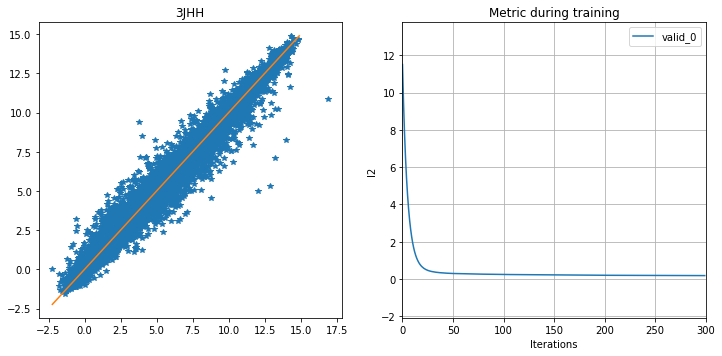

In [53]:
from models import LGBModel
from models import partition_data

#coupling_types = sorted(labelled_enh.type.unique())[0:1]
coupling_types = ['3JHH']
models = {}
def run_test(data, count=None):
    global model
    
    plt.figure(figsize=(25, 25))
    for i, t in enumerate(coupling_types, 1):    
        data_df = data[data.type == t]
        if count is not None:
            data_df = data_df.head(count)

        train_df, valid_df, test_df = partition_data(data_df)
        
        if len(train_df) < 10 or len(test_df) < 10:
            continue
            
        print(f'Training {len(train_df)} samples for {t}')

        model = LGBModel(dict(molecules=molecules, 
                              structures=structures,
                              verbose=True),
                         lgb_model_args, lgb_fit_args)
        models[t] = model

        model.fit(train_df, train_df, valid_df, valid_df)
        output, score = model.evaluate(test_df, test_df)
        
        print(f'{t} score: {score} (trained on {len(train_df)} elements)')
        plt.subplot(4, 4, 2 * i - 1)
        plt.plot(test_df.scalar_coupling_constant, output, '*')
        mn = min(test_df.scalar_coupling_constant.min(), output.min())
        mx = min(test_df.scalar_coupling_constant.max(), output.max())
        plt.plot([mn, mx], [mn, mx])
        plt.title(t)
        
        ax = plt.subplot(4, 4, 2 * i)
        model.plot_metric(ax=ax)
    plt.show()
        
run_test(labelled_enh, 100000)


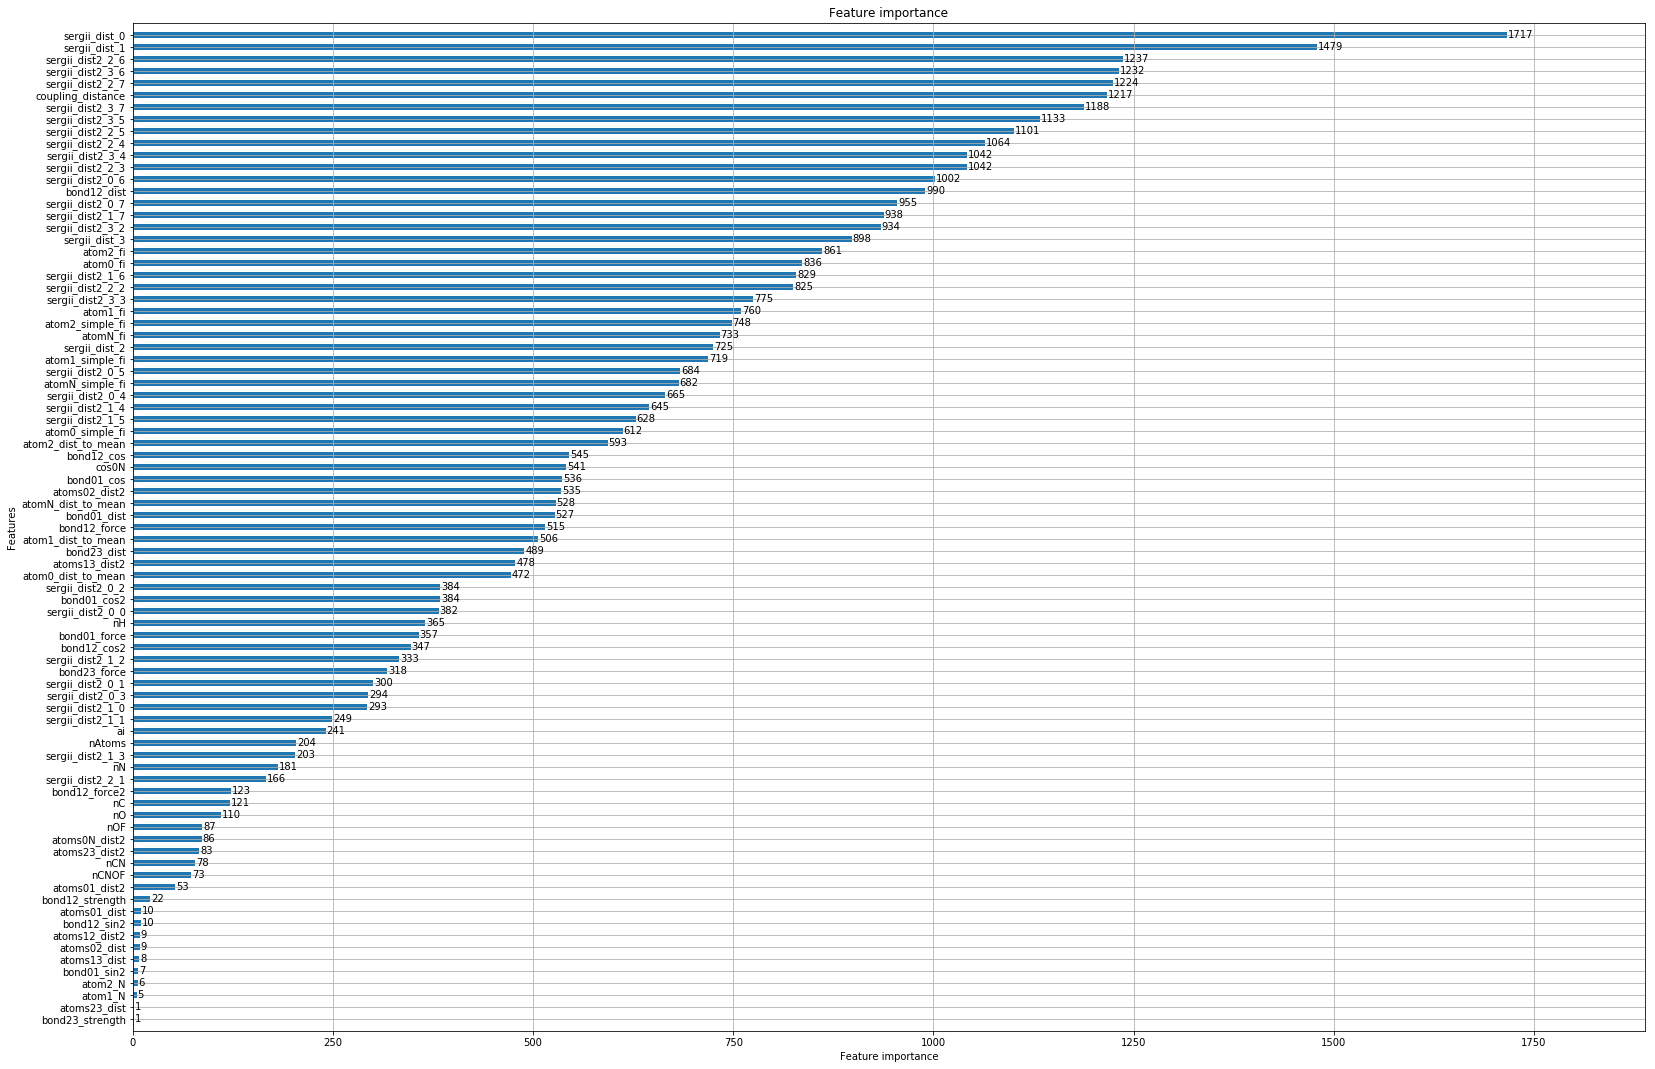

In [54]:
from models import LGBModel
fig = plt.figure(figsize=(21, 14))
model.plot_importance(ax=fig.add_axes([0, 0, 1, 1]), height=0.5)
plt.show()

In [41]:
model.last_numeric_input_df.loc[:, ['bond12_cos']].head()

,bond12_cos
78638,-0.329336
262263,-0.353853
361136,-0.329120
71155,-0.400130
742161,-0.390689


In [ ]:
list(model.last_numeric_input_df.columns)

In [ ]:
from models import LGBModel

def train(data):
    models = {}
    for t in sorted(data.type.unique()):
        train_df = data[data.type == t]
        print(f'Training {len(train_df)} samples for {t}')
        model = LGBModel(dict(molecules=molecules, 
                              structures=structures),
                         lgb_args)
        models[t] = model
        model.fit(train_df, train_df)
    
    return models

models = train(labelled_enh)

In [ ]:
def predict(data, models):
    out_df = None
    
    for t in sorted(data.type.unique()):
        predict_df = data[data.type == t]
        print(f'Predicting {len(predict_df)} samples for {t}')
        output = models[t].predict(predict_df)
        
        id = predict_df['id']
        out_df_coupling = pd.DataFrame(data={'id':id, 'scalar_coupling_constant':output}, index=predict_df.index)
        
        if out_df is None:
            out_df = out_df_coupling
        else:
            out_df = out_df.append(out_df_coupling).sort_index()

    return out_df.sort_index()
    
#%prun -s cumulative f(unlabelled.head(10000))
prediction = predict(unlabelled_enh, models)

In [ ]:
prediction.head()

In [ ]:
prediction.to_csv('../data/pred.csv',index=False)